In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
prec = np.array([1, 0.5, 0.6666, 0.5, 0.4, 0.3333, 0.2587, 0.25, 0.2222, 0.3, 0.2727, 0.3333, 0.3846, 0.4285, 0.4, 0.375, 0.3529, 0.3333, 0.3157, 0.3, 0.2857, 0.2727, 0.3043, 0.2916 ])

In [12]:
recal = np.array([0.0666, 0.0666, 0.1333, 0.1333, 0.1333, 0.1333, 0.1333, 0.1333, 0.1333, 0.2, 0.2, 0.2666, 0.3333, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4666, 0.4666])
print(prec.shape, recal.shape)

(24,) (24,)


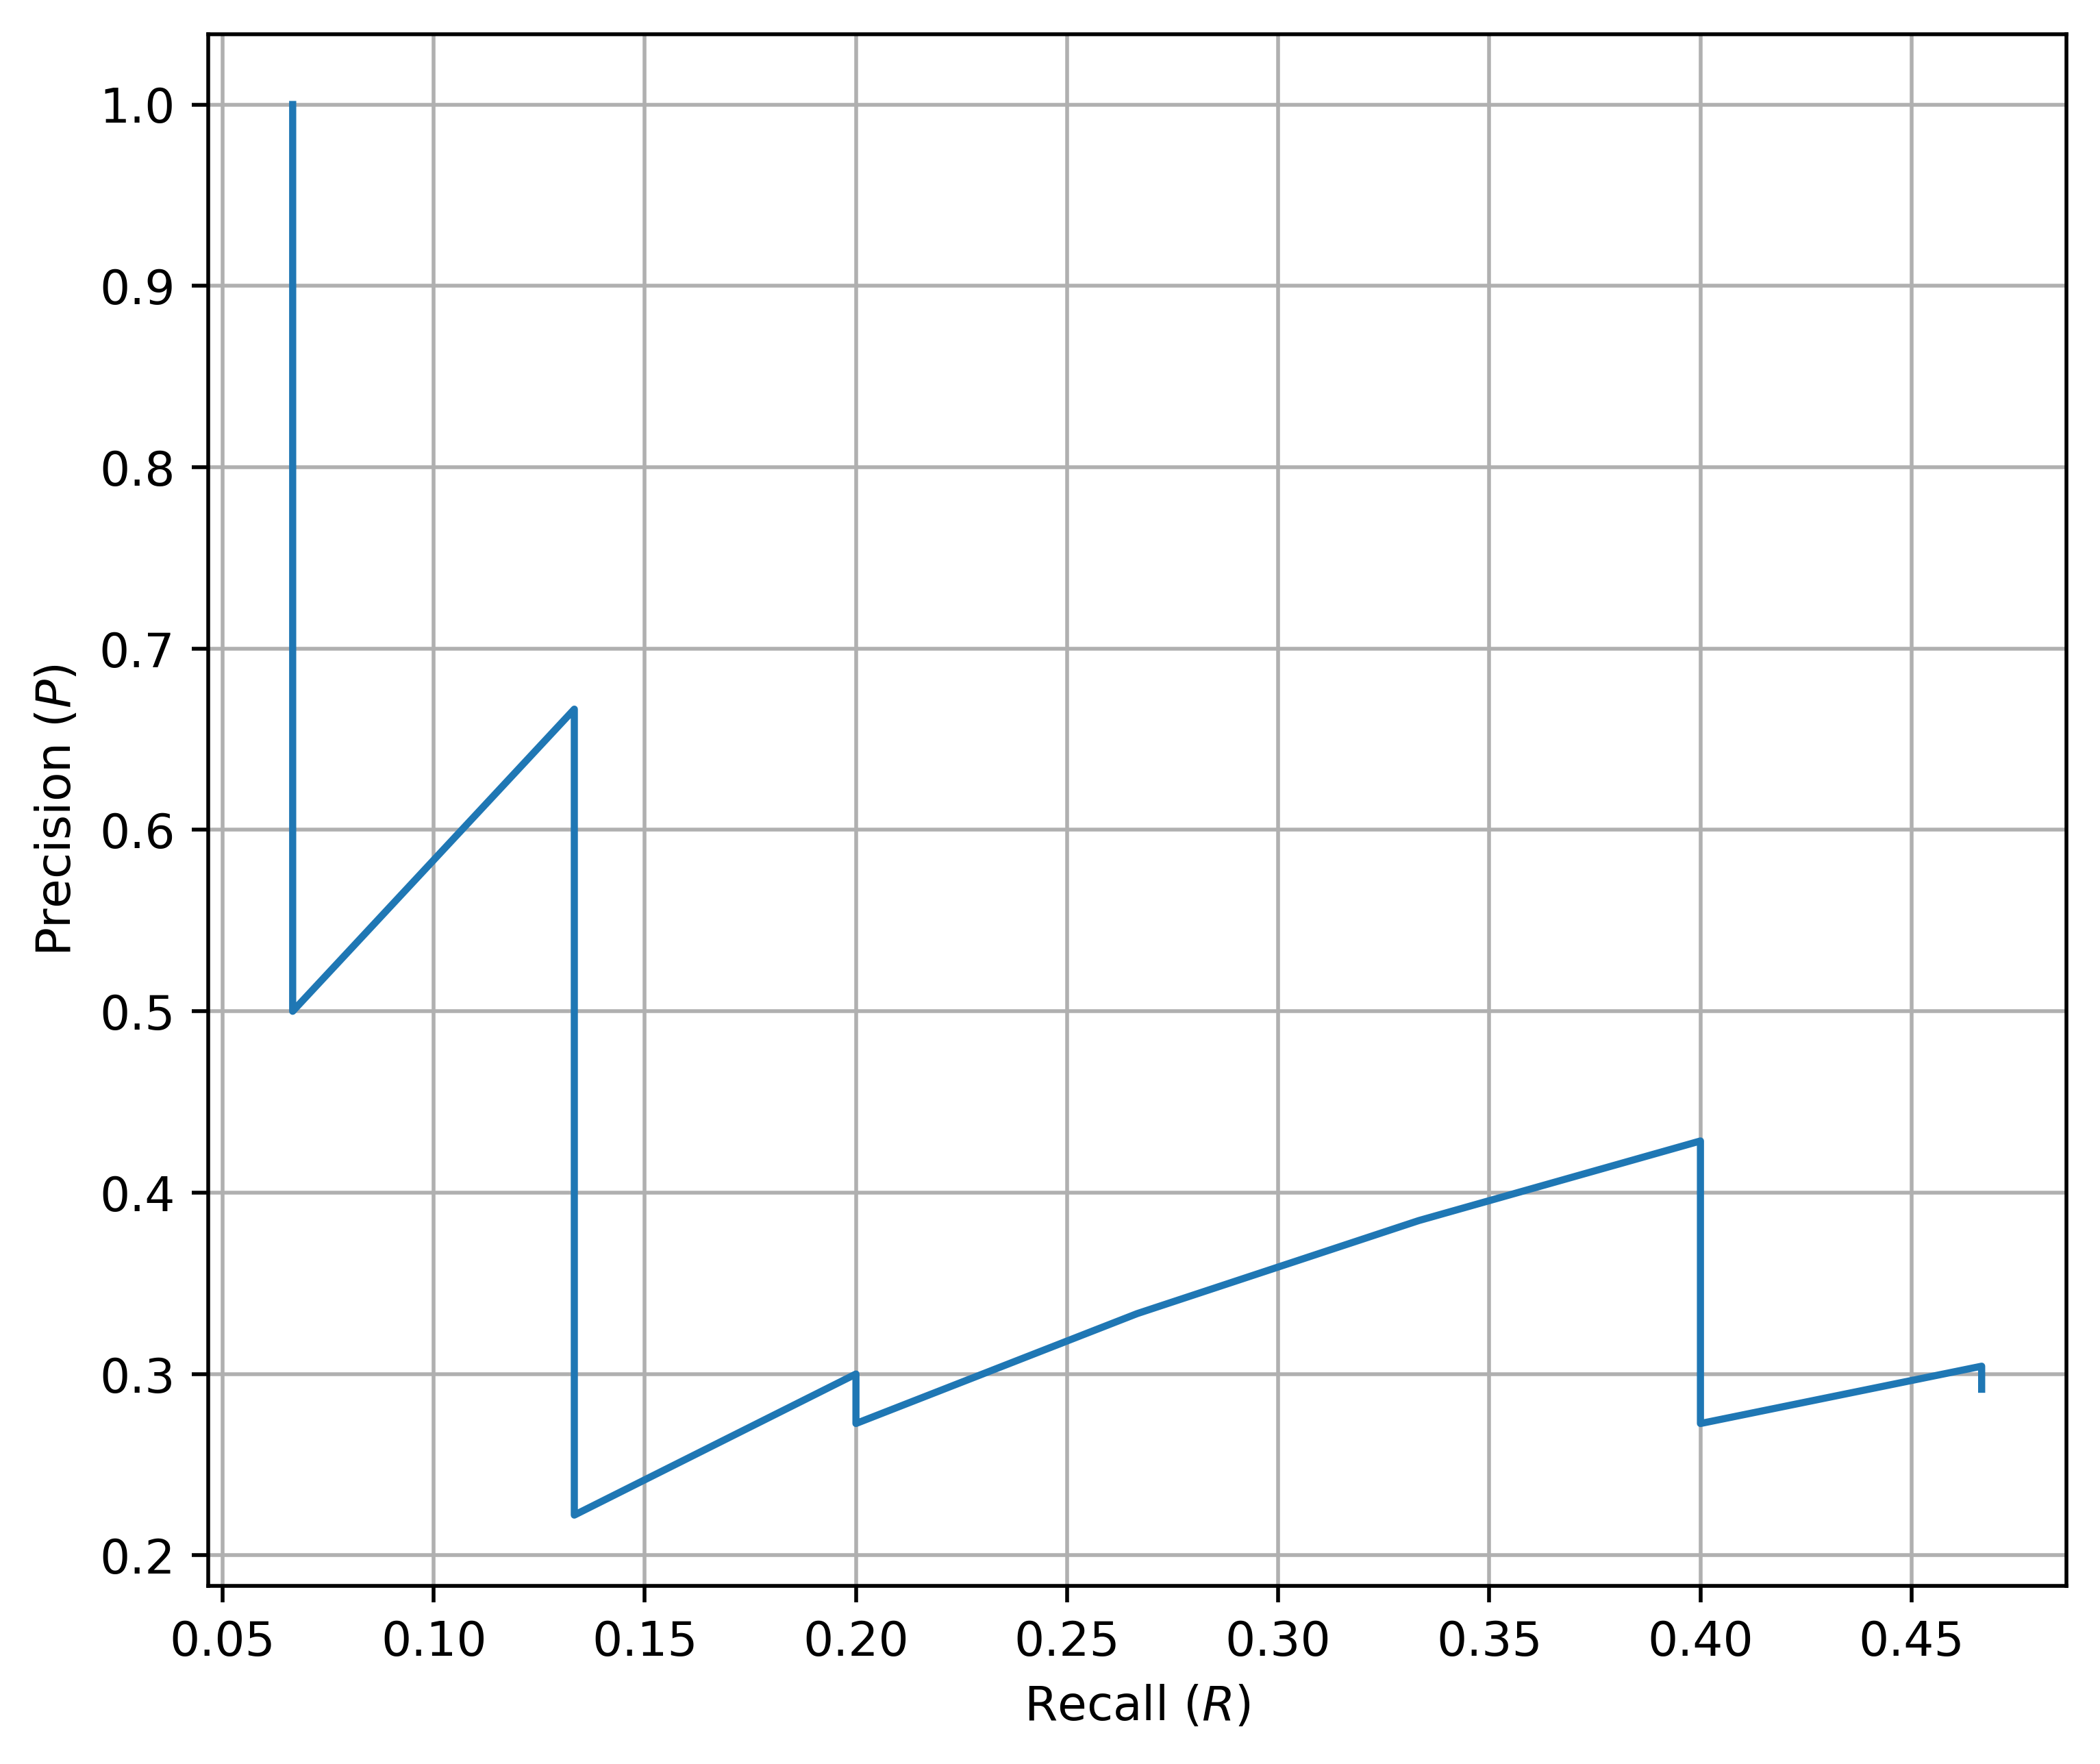

In [24]:
plt.figure(figsize = (7,6),dpi= 500)
plt.plot(recal, prec)
plt.grid("true")
plt.xlabel("Recall $(R)$")
plt.ylabel("Precision $(P)$")
plt.savefig("pxr.pdf")


In [14]:
buckets11 = np.array([i/10 for i in range(11)])
AP11= np.zeros(buckets11.shape)

In [15]:
for j in range(AP11.shape[0]):
    if j <10:
        prec_range = prec[recal >= buckets11[j]]
        
    if prec_range.shape[0] > 0:
        AP11[j] =  prec_range.max()
    else:
        AP11[j] = 0


Text(0, 0.5, 'Precision $(P)$')

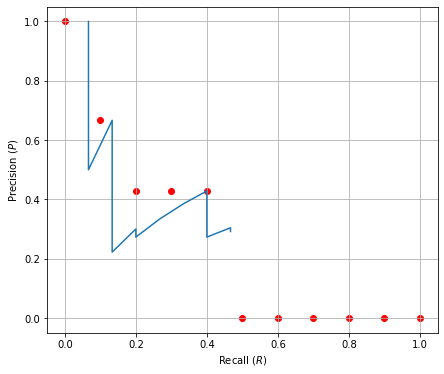

In [25]:
plt.figure(figsize = (7,6))
plt.plot(recal, prec)
plt.scatter(buckets11, AP11, color = 'red')
plt.grid("true")
plt.xlabel("Recall $(R)$")
plt.ylabel("Precision $(P)$")

In [17]:
buckets = np.linspace(0, 1, 1000)
APall= np.zeros(buckets.shape)

for j in range(APall.shape[0]):

    prec_range = prec[recal >= buckets[j]]
        
    if prec_range.shape[0] > 0:
        APall[j] =  prec_range.max()
    else:
        APall[j] = 0


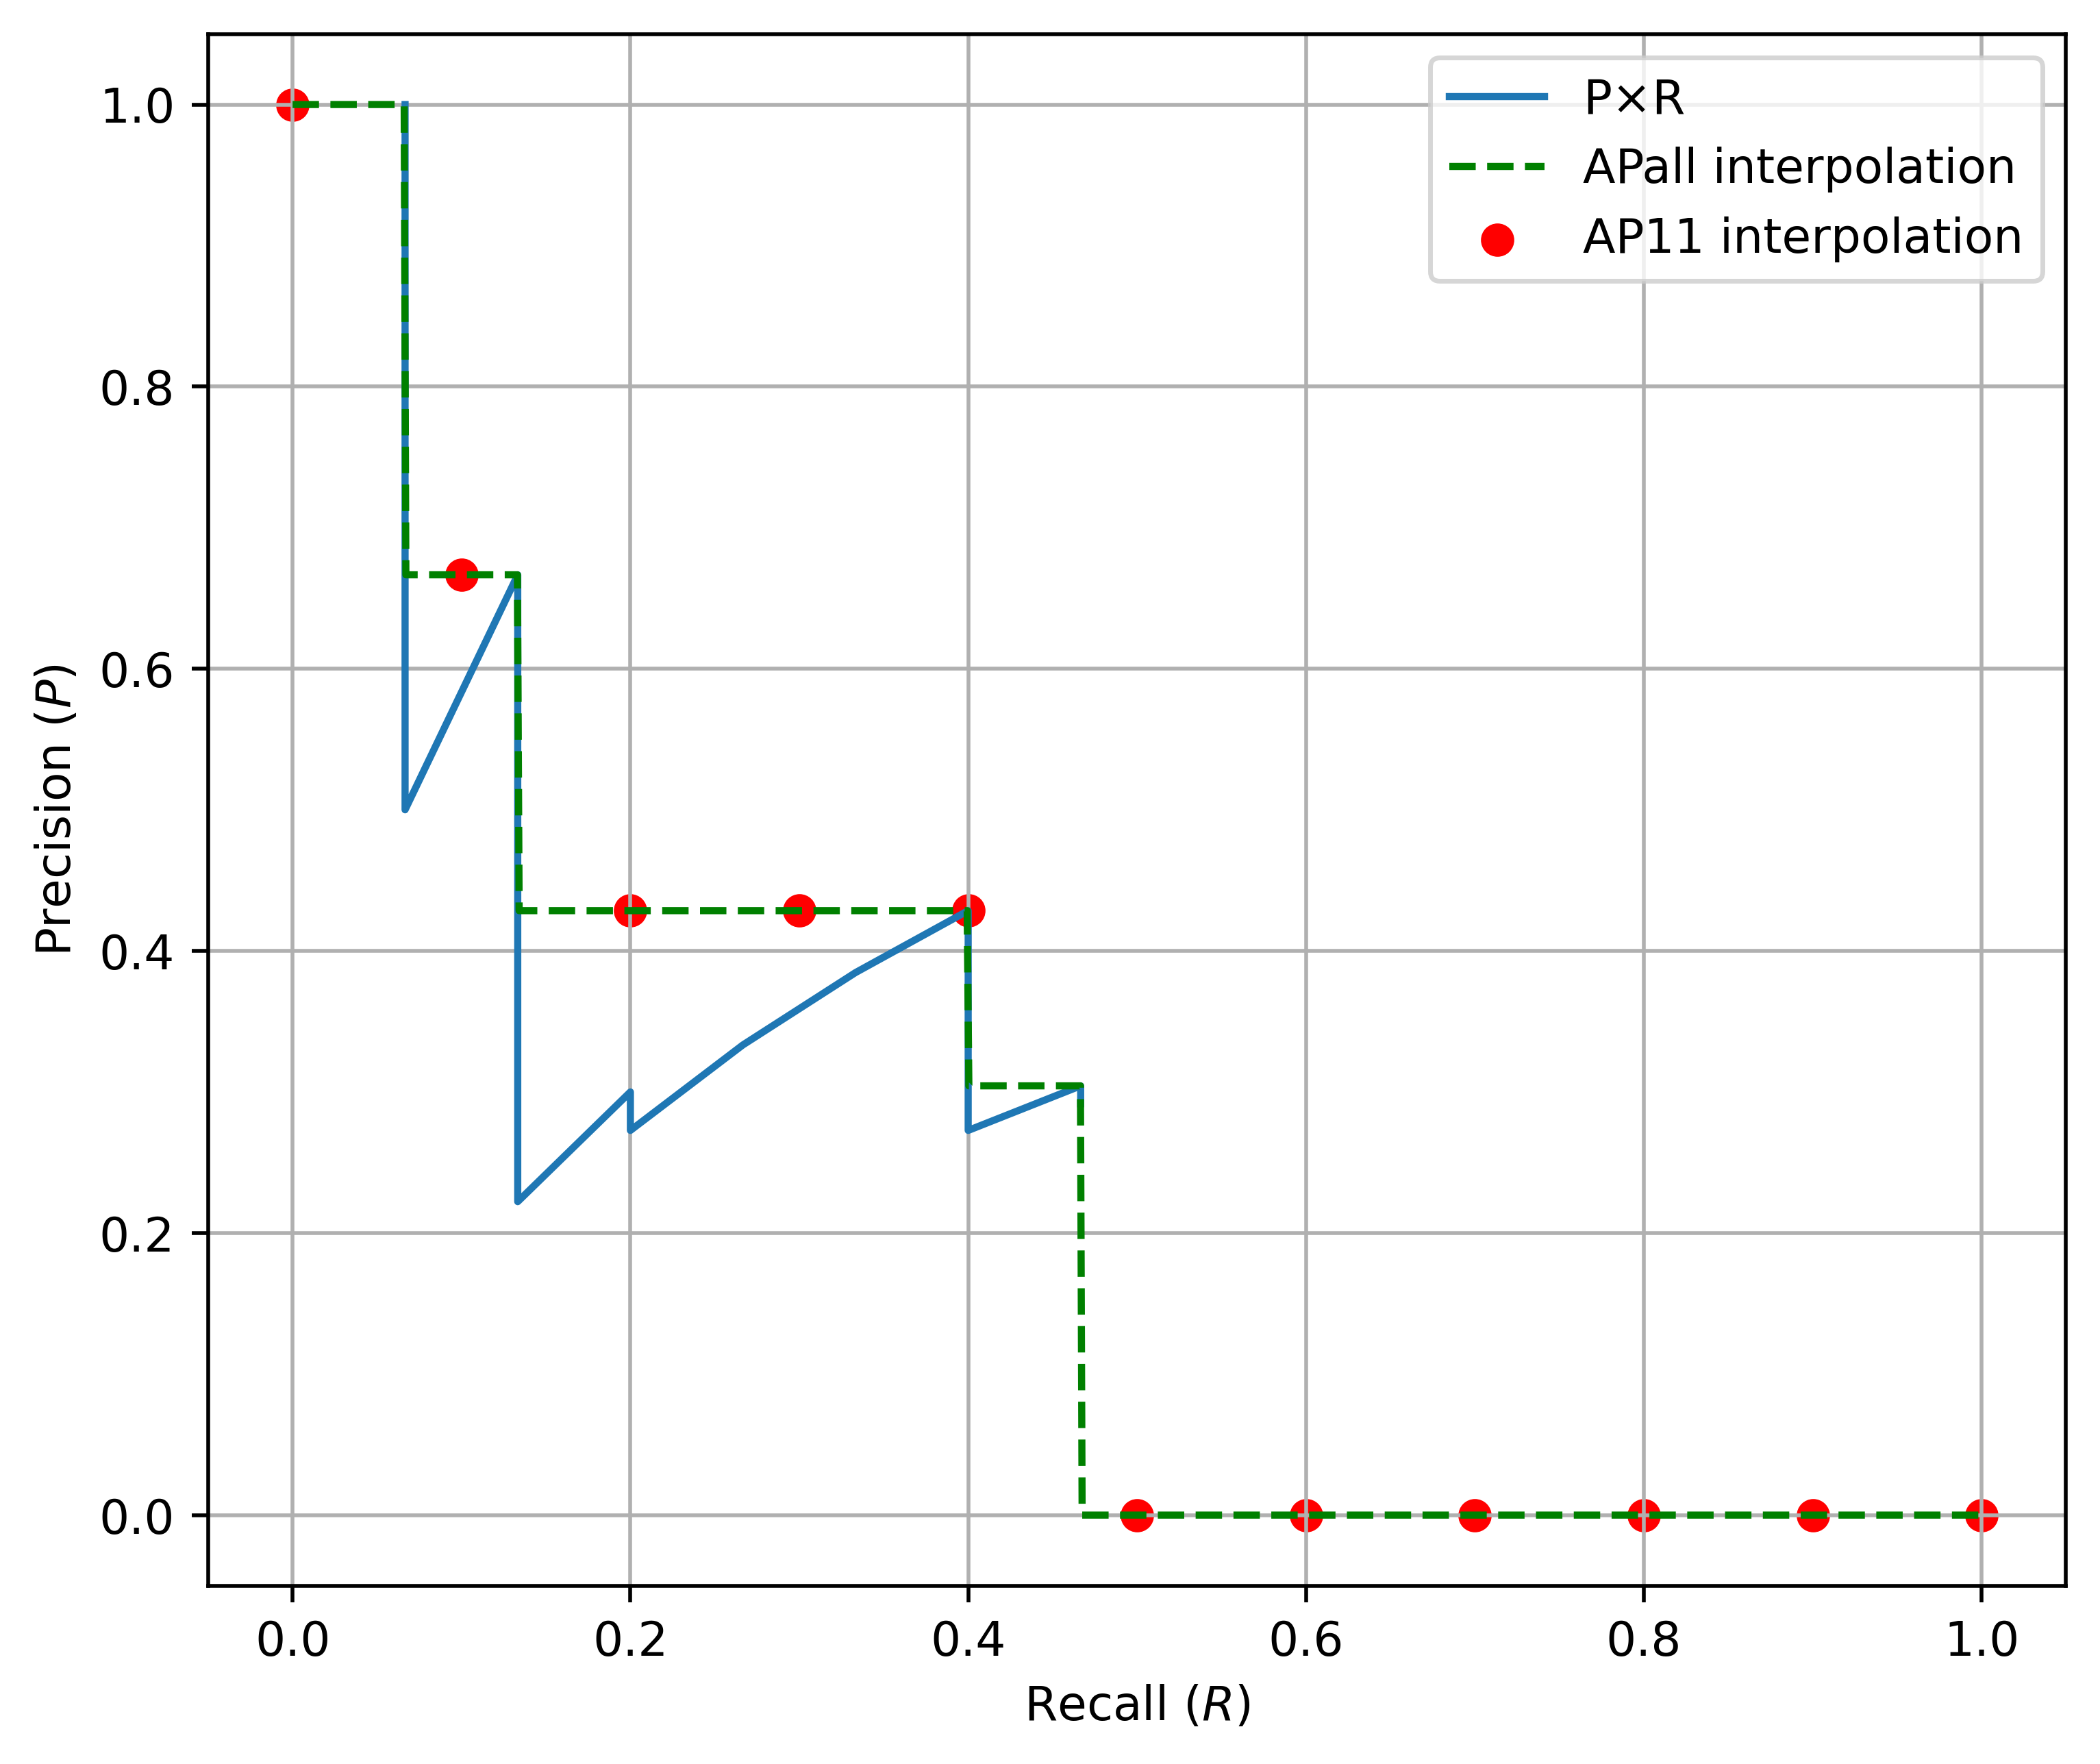

In [27]:
plt.figure(figsize = (7,6),dpi= 500)
plt.plot(recal, prec, label = r'P$\times$R')
plt.plot(buckets, APall, 'g--', label = 'APall interpolation')
plt.scatter(buckets11, AP11, color = 'red', label = 'AP11 interpolation')
plt.grid("true")
plt.xlabel("Recall $(R)$")
plt.ylabel("Precision $(P)$")
plt.legend()
plt.savefig("pxrapprox.pdf")
